In [1]:
import pandas as pd

In [2]:
%%capture
from sklearn.datasets import load_boston

boston = load_boston()

In [3]:
print(boston.data.shape)

print(boston.target.shape)

(506, 13)
(506,)


In [4]:
X = pd.DataFrame(data=boston.data, columns=boston.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
y = pd.DataFrame(data=boston.target, columns=['MEDV'])
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
X.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [9]:
y.isna().sum()

MEDV    0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

In [12]:
prediction

array([[28.64896005],
       [36.49501384],
       [15.4111932 ],
       [25.40321303],
       [18.85527988],
       [23.14668944],
       [17.3921241 ],
       [14.07859899],
       [23.03692679],
       [20.59943345],
       [24.82286159],
       [18.53057049],
       [-6.86543527],
       [21.80172334],
       [19.22571177],
       [26.19191985],
       [20.27733882],
       [ 5.61596432],
       [40.44887974],
       [17.57695918],
       [27.44319095],
       [30.1715964 ],
       [10.94055823],
       [24.02083139],
       [18.07693812],
       [15.934748  ],
       [23.12614028],
       [14.56052142],
       [22.33482544],
       [19.3257627 ],
       [22.16564973],
       [25.19476081],
       [25.31372473],
       [18.51345025],
       [16.6223286 ],
       [17.50268505],
       [30.94992991],
       [20.19201752],
       [23.90440431],
       [24.86975466],
       [13.93767876],
       [31.82504715],
       [42.56978796],
       [17.62323805],
       [27.01963242],
       [17

In [13]:
pd.DataFrame(lr.coef_.reshape(-1, 1), index=X_train.columns, columns=['Coefficient'])

,Coefficient
CRIM,-0.133470
ZN,0.035809
INDUS,0.049523
CHAS,3.119835
NOX,-15.417061
RM,4.057199
AGE,-0.010821
DIS,-1.385998
RAD,0.242727
TAX,-0.008702


Text(0, 0.5, 'Предсказанная цена')

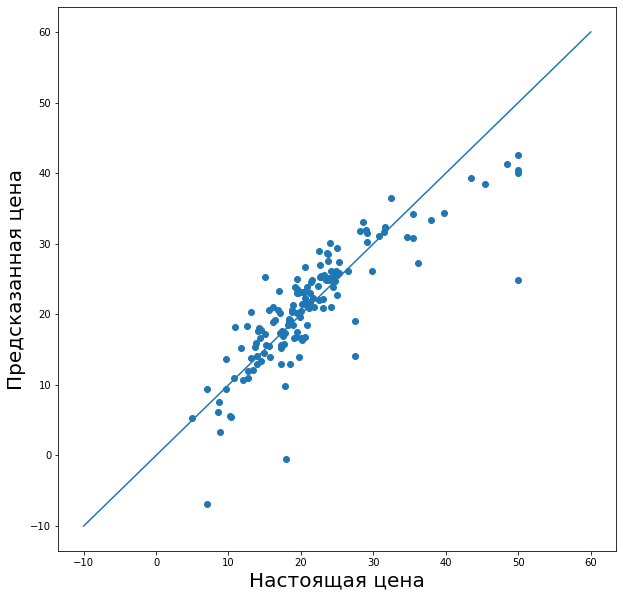

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(y_test, prediction)
plt.plot([-10, 60], [-10, 60])
plt.xlabel('Настоящая цена', fontsize=20)
plt.ylabel('Предсказанная цена', fontsize=20)
